In [23]:
%matplotlib inline
from preamble import *
from IPython.display import set_matplotlib_formats, display, HTML
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import mglearn
df = pd.read_csv('applesOranges.csv');

def sign_function(weight,x,theta):
    return 1 if np.dot(weight,x)[0]-theta > 0 else 0

# H2.1

### (a) 

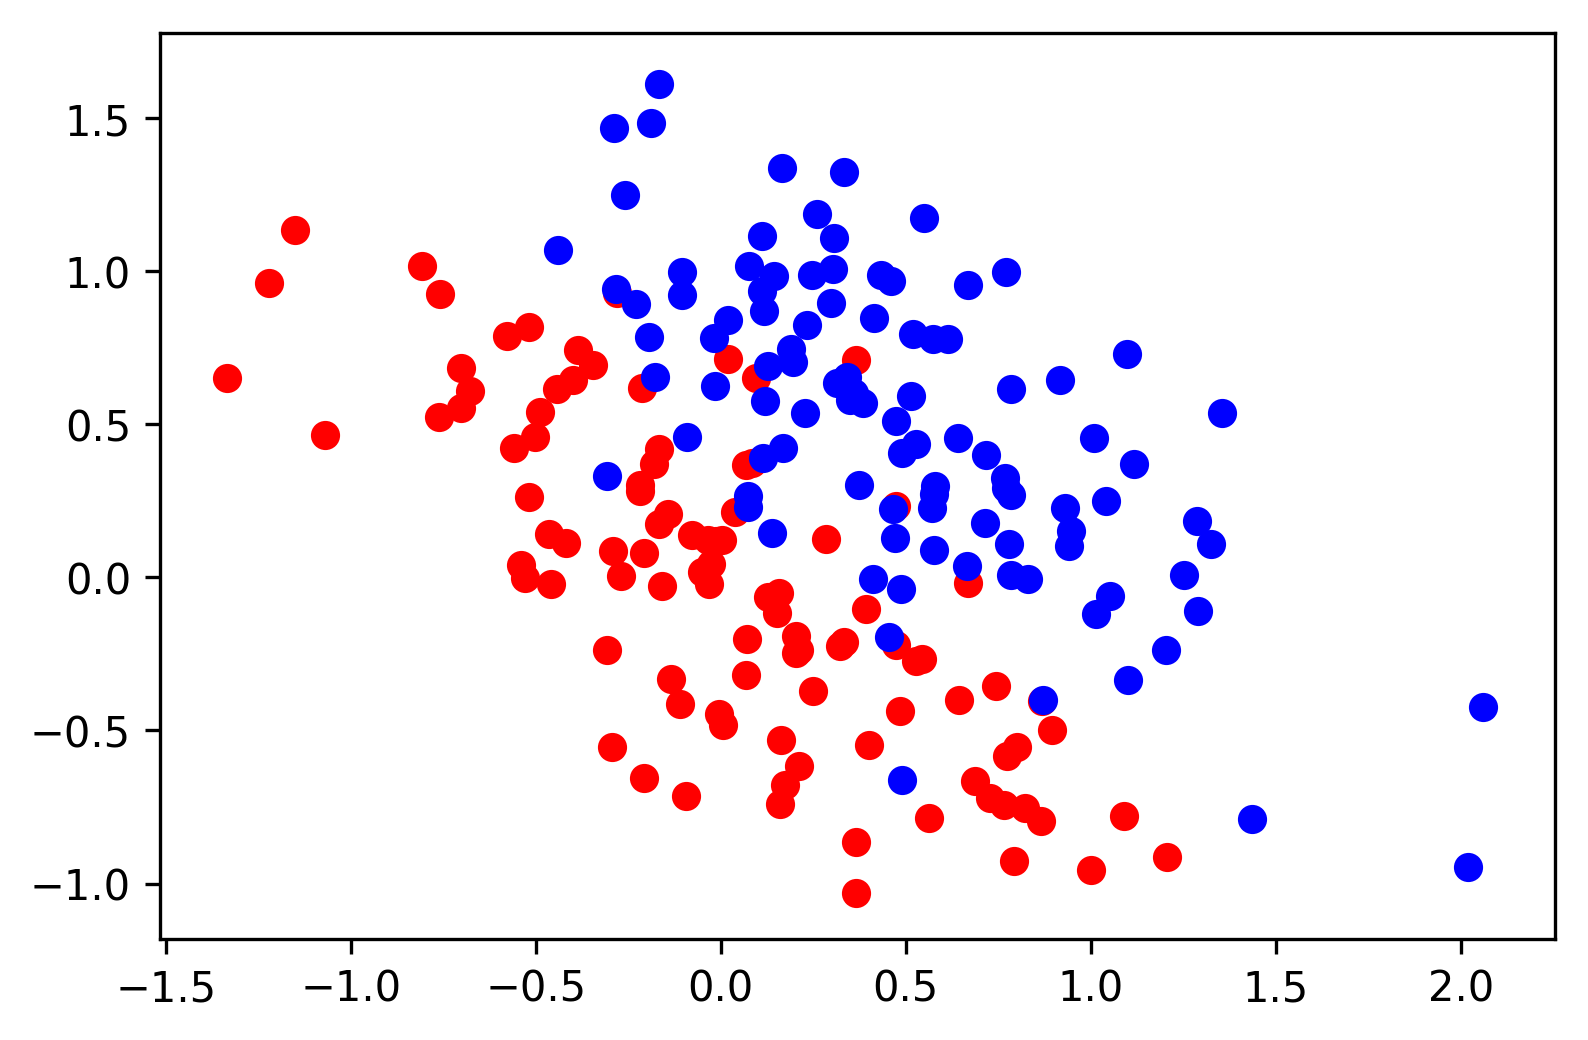

In [24]:
df1 = df.where(df['y']==0)
df2 = df.where(df['y']==1)
plt.scatter(df1['x.1'],df1['x.2'],c='red')
plt.scatter(df2['x.1'],df2['x.2'],c='blue')


### (b) 

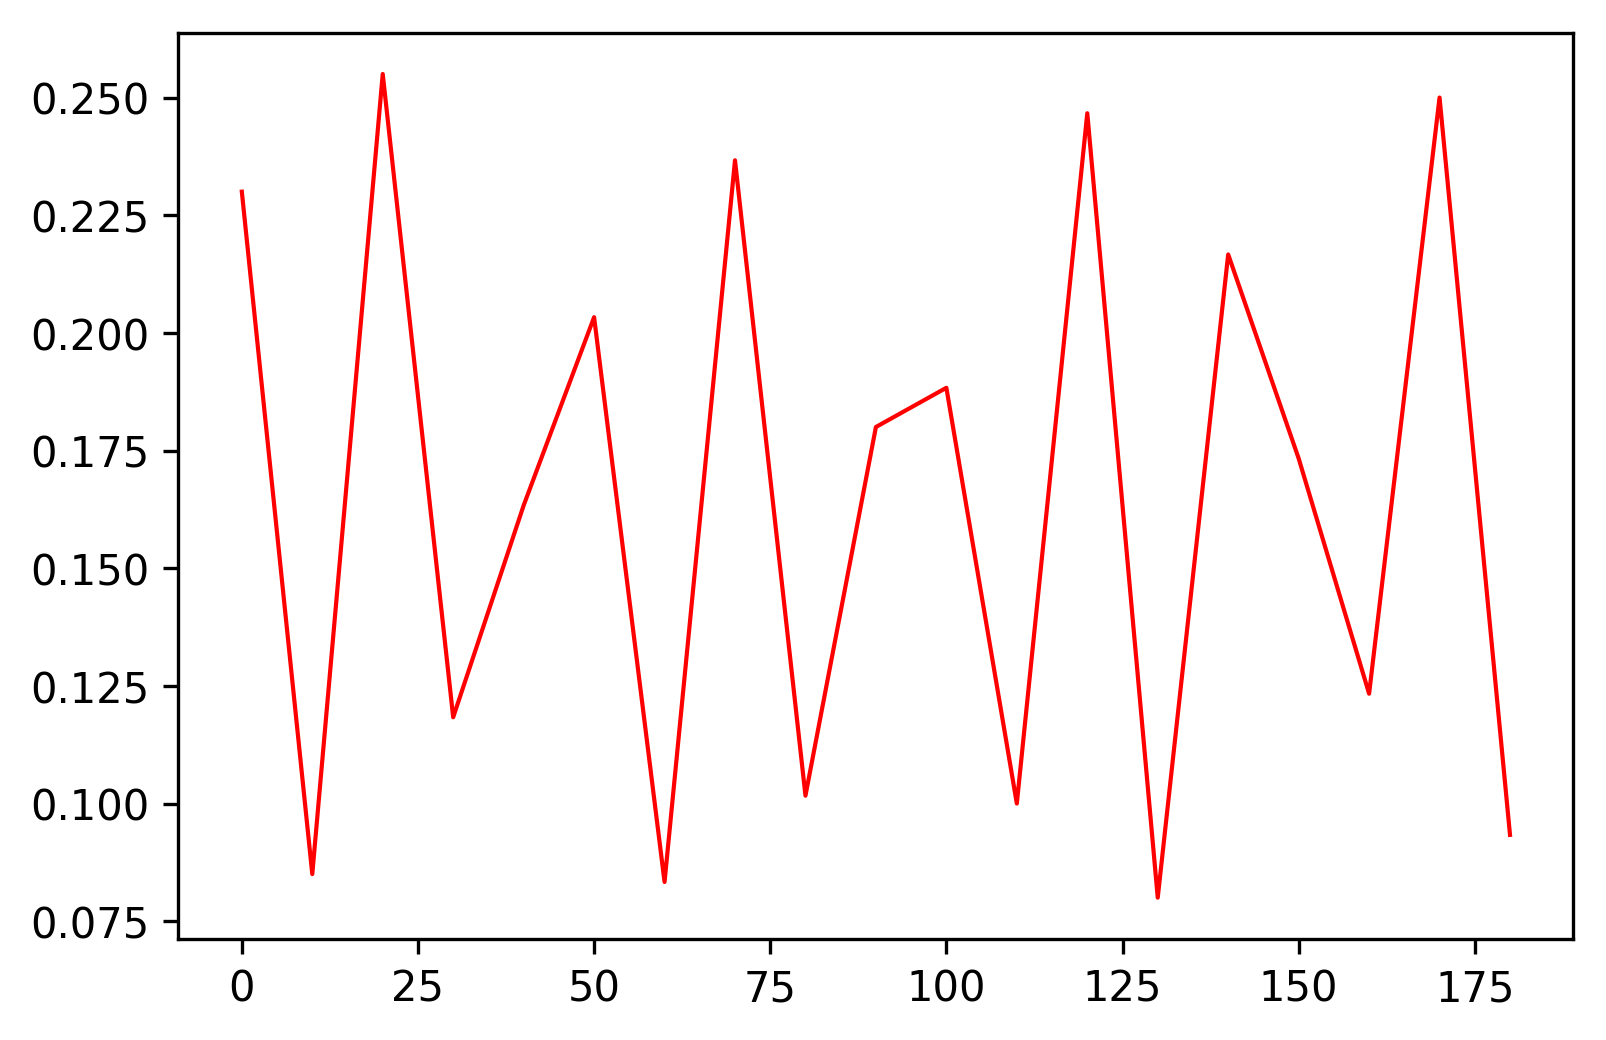

In [21]:
bias_theta = 0
vectors = np.zeros((19,2))
alfa = 0
alfas = []
for i in range(19):
    vectors[i] = [math.sin(alfa),math.cos(alfa)]
    alfas.append(alfa)
    alfa = alfa + 10
performance = []
for i in range(19):
    correct = 0
    for index,row in df.iterrows():
        if sign_function(vectors[i],np.array((row['x.1'],row['x.2'])).reshape(2,1),bias_theta) == row['y']:
            correct = correct + 1
    performance.append(correct/float(df.size))
plt.plot(alfas,performance,'red',linewidth = 1)

### (c)

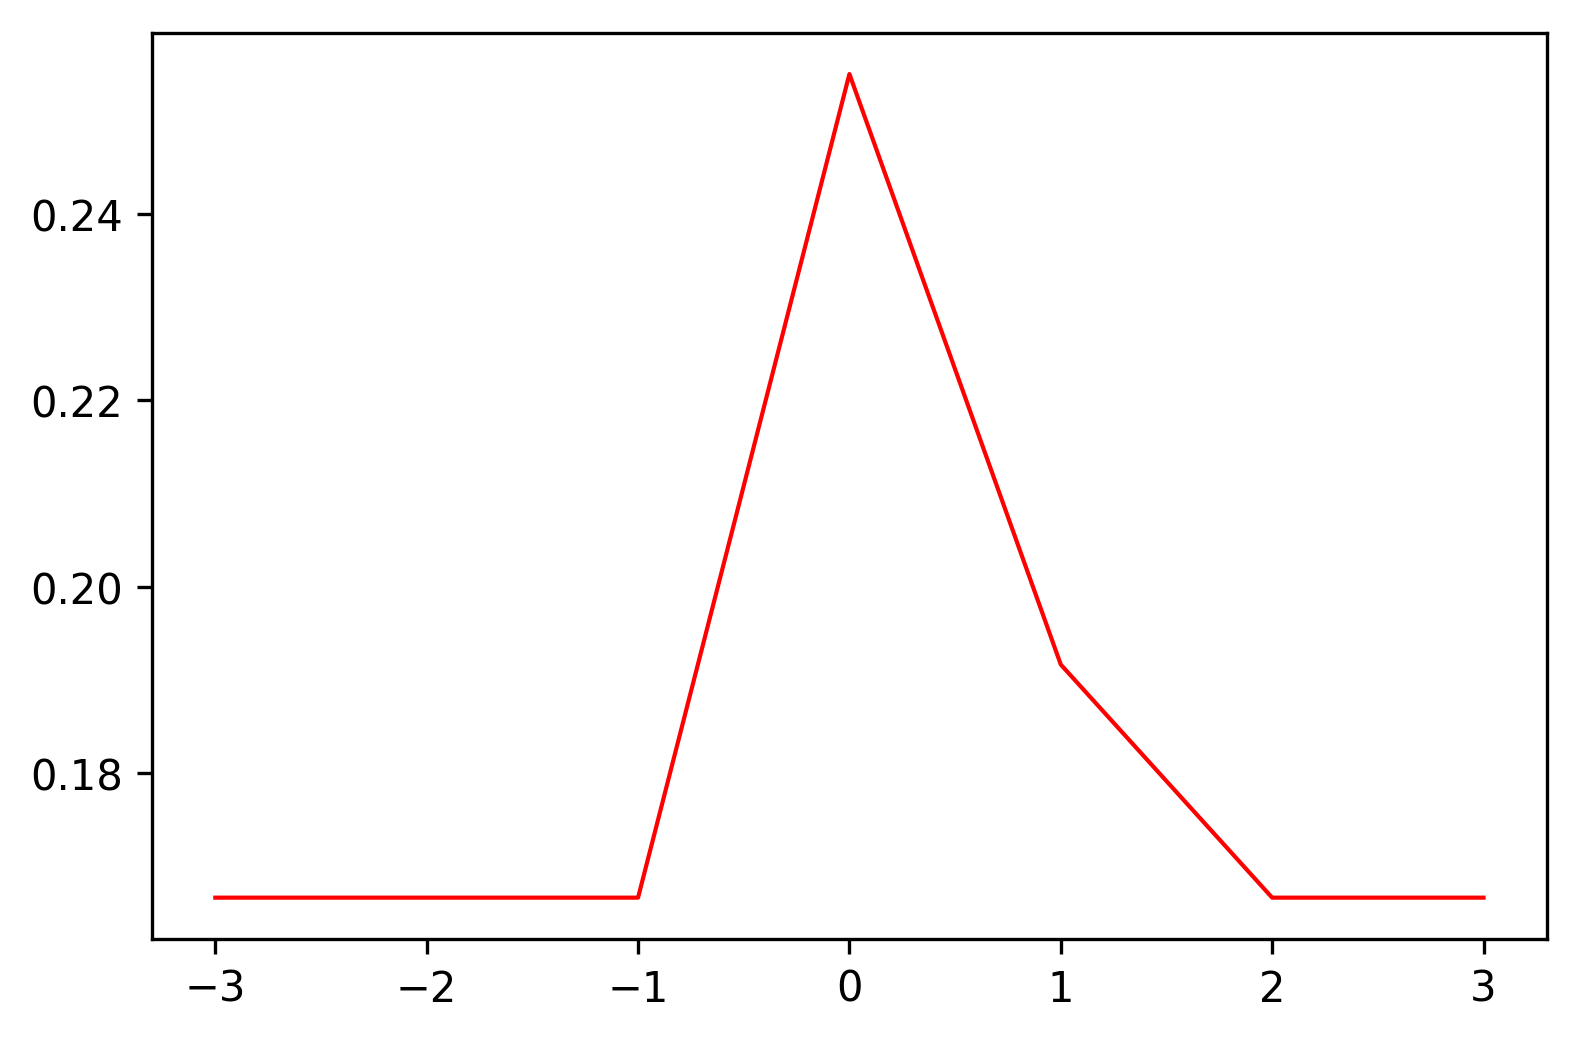

In [20]:
thetas = [-3,-2,-1,0,1,2,3]
performances = []
for theta in thetas:
    correct = 0
    for index,row in df.iterrows():
        if sign_function(vectors[2],np.array((row['x.1'],row['x.2'])).reshape(2,1),theta) == row['y']:
            correct = correct + 1
    performances.append(correct/float(df.size))
    
plt.plot(thetas,performances,'red',linewidth = 1)

In [122]:
sign_function(np.array((1,10)),np.array((-10,1)).reshape(2,1),1)
np.dot(np.array((1,10)),np.array((-10,1)).reshape(2,1))[0]

0

### (d)not sure 

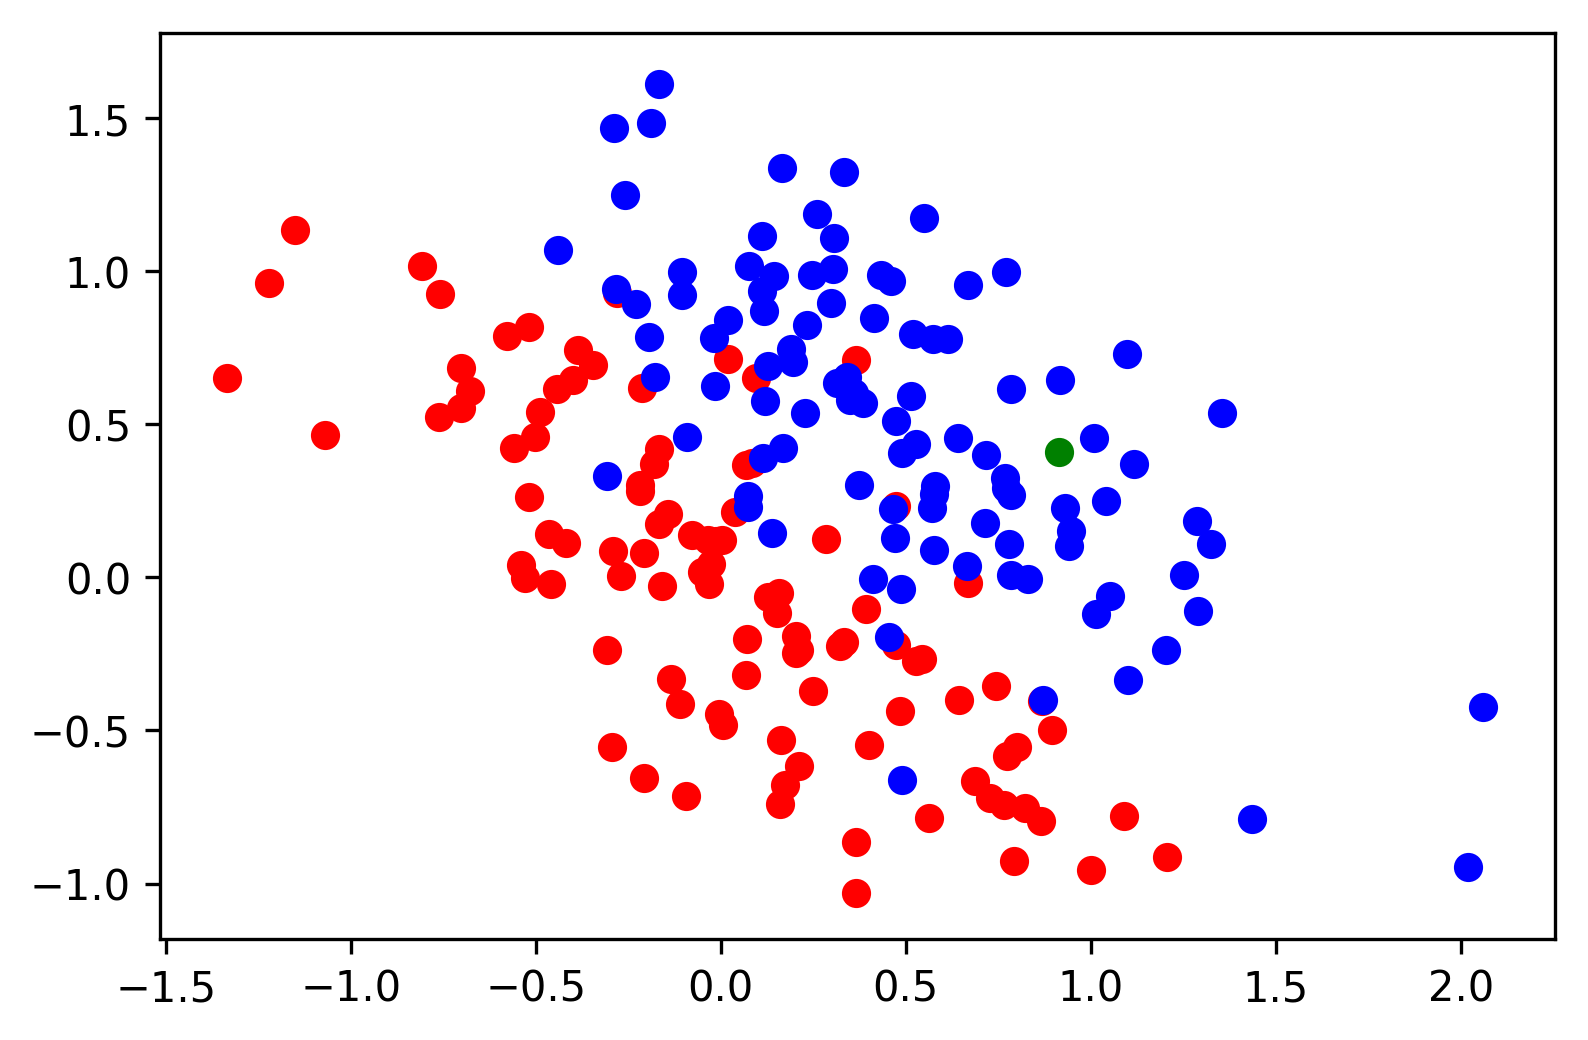

In [19]:
df_t = df
for index,row in df_t.iterrows():
    row['y'] = sign_function(vectors[2],np.array((row['x.1'],row['x.2'])).reshape(2,1),0)

df1 = df_t.where(df_t['y']==0)
df2 = df_t.where(df_t['y']==1)
plt.scatter(df1['x.1'],df1['x.2'],c='red')
plt.scatter(df2['x.1'],df2['x.2'],c='blue')
plt.scatter(vectors[2][0],vectors[2][1],c='green')



### (e)


In [9]:

vectors = np.zeros((19,2))
alfa = 0
alfas = []
for i in range(19):
    vectors[i] = [math.sin(alfa),math.cos(alfa)]
    alfas.append(alfa)
    alfa = alfa + 10
thetas = [i for i in range(-10,10)]
results = []
for theta in thetas:
    for weight in vectors:
        correct = 0
        for index,row in df.iterrows():
            if sign_function(weight,np.array((row['x.1'],row['x.2'])).reshape(2,1),theta) == row['y']:
                correct = correct + 1
        results.append(correct/float(df.size))
    

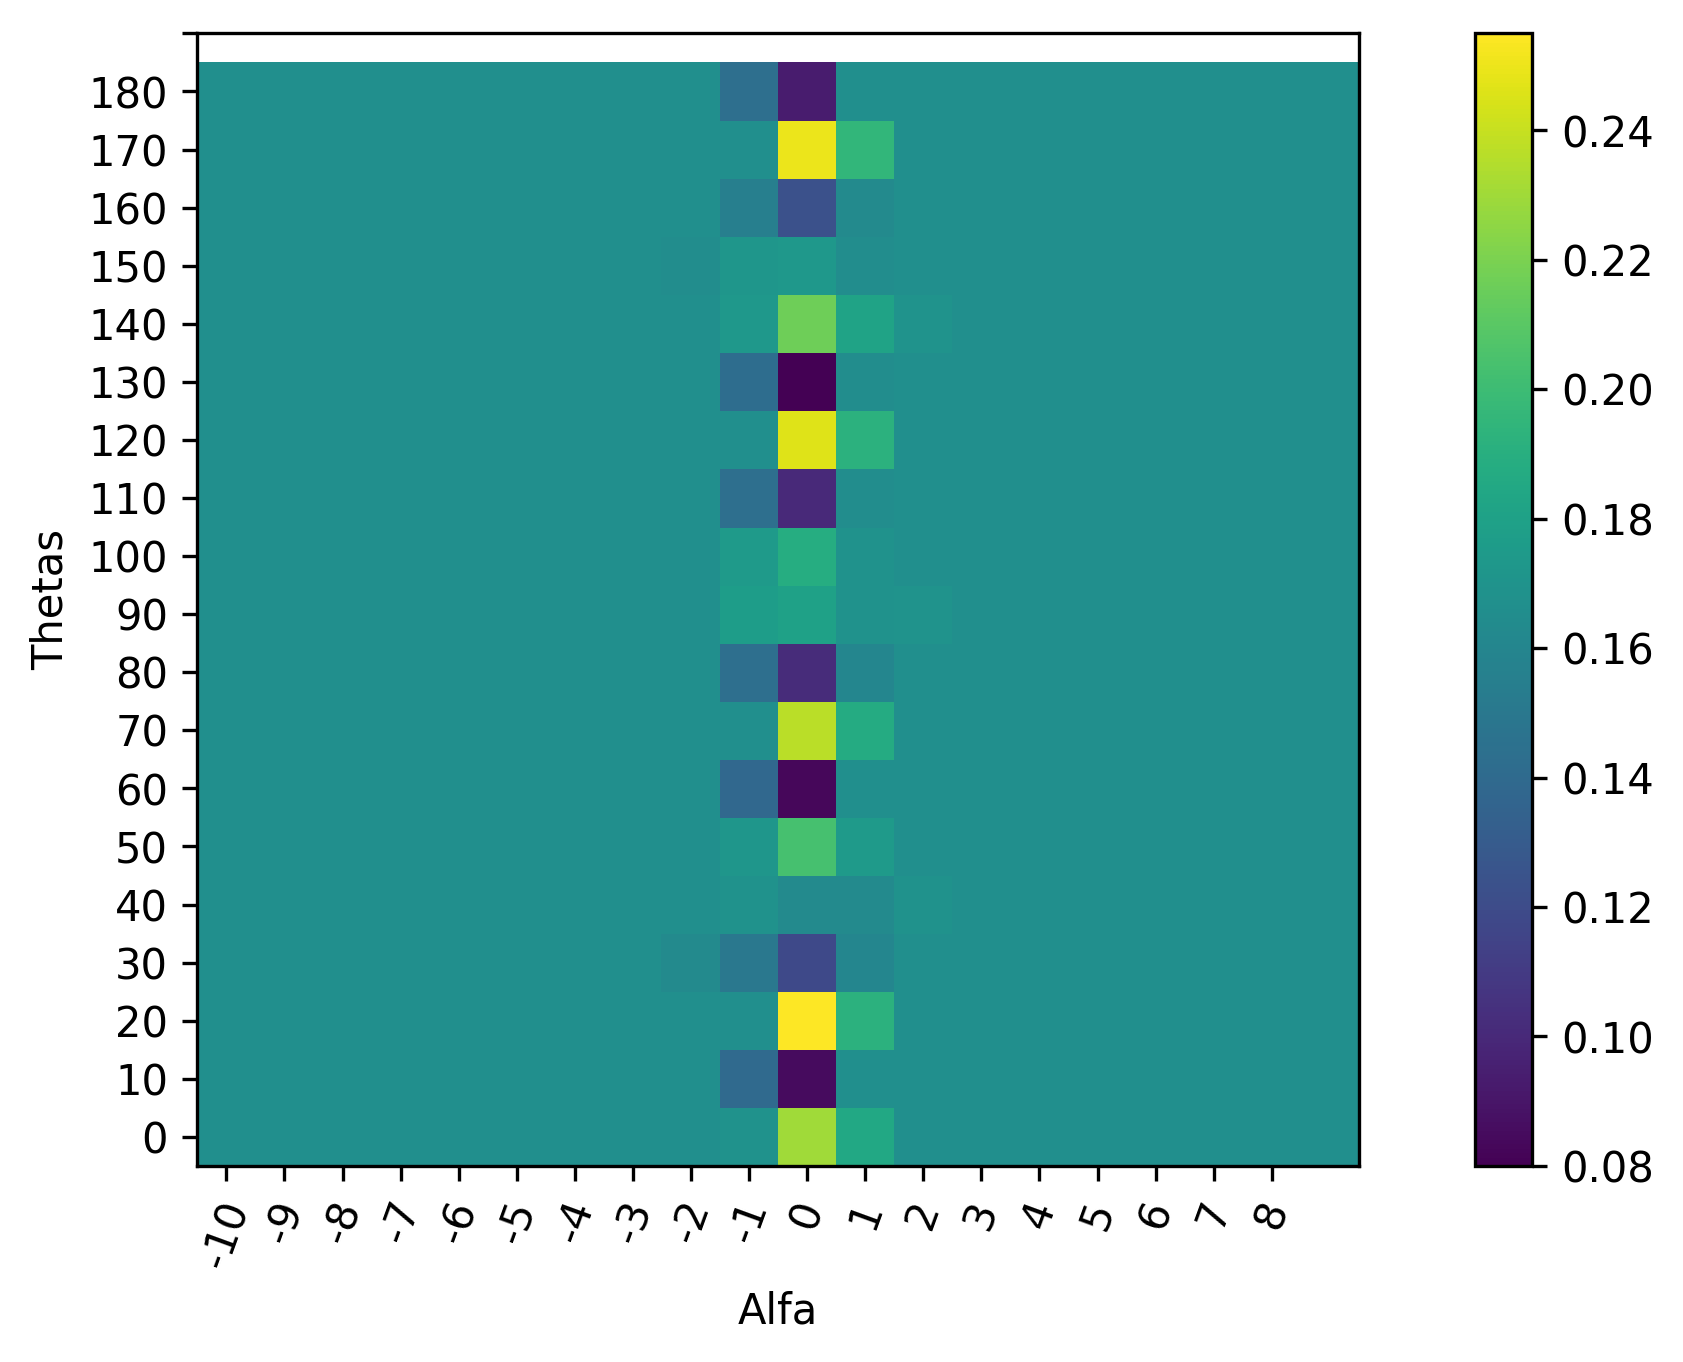

In [17]:

scores = np.array(results).reshape(
    len(thetas),
    len(vectors)
).T;

plt.figure(figsize=(10, 5))
img = mglearn.tools.heatmap(
    scores, cmap='viridis', fmt='',
    ylabel='Thetas', yticklabels=thetas,
    xlabel='Alfa', xticklabels=alfas,
);
plt.setp(img.get_axes().xaxis.get_majorticklabels(),rotation=70);
plt.xticks(plt.xticks()[0], [ x for x in thetas]);
plt.yticks(plt.yticks()[0], [ x for x in alfas]);
plt.colorbar(img);

### (f)Can the optimization method (e) be applied to any classification problem? Discuss potential problems and give an application example in which the above method must fail.


### Exercise H2.2: Multi-layer Perceptrons (homework, 4 points)

(a) For a MLP with input x ∈ R and one hidden layer, the input-output function can be computed
as
yˆ(x) =
nXhid
i=1
wif(ai(x − bi))
with output weights wi and parameters ai and bi for each hidden unit i. Create 50 MLPs with
nhid = 10 hidden units by sampling for each one a set of random parameters {wi
, ai
, bi}, i =
1, ..., 10 and using f := tanh as the transfer function. Use normally distributed ai ∼
N (0, 2), wi ∼ N (0, 1) and uniformly distributed bi ∼ U(−2, 2). Plot the input-output
functions of these 50 MLPs for x ∈ [−2, 2].

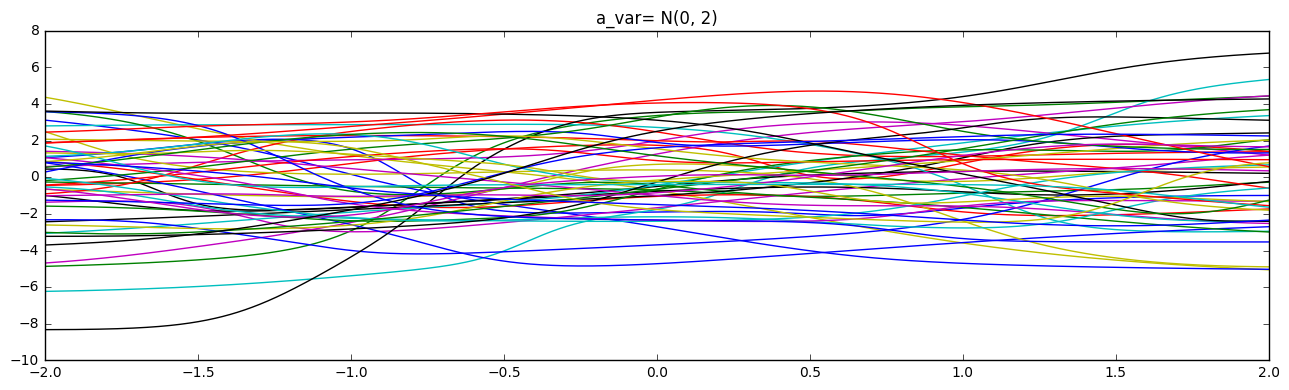

In [58]:
##2.2a
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
%matplotlib inline
np.random.seed(123)

def y(x, w, a, b):
    return (w * np.tanh(a * (x - b))).sum()

def mlps(X, a_var, mlpNum=50, numHiden=10):
    mlps = [(np.random.normal(loc=0, scale=1, size=numHiden),
             np.random.normal(loc=0, scale=a_var, size=numHiden),
             np.random.uniform(-2, 2, numHiden))
            for _ in range(mlpNum)]
    all_output = [([y(x, w, a, b) for x in X], w, a, b) for w, a, b in mlps]
    return [(list(zip(X, ys))) for ys, w, a, b in all_output]



def plot_mlps(values, label):
    fig, ax = plt.subplots(1, 1, figsize=(13, 4))
    for xs_ys in values:
        data = np.array(xs_ys).T
        ax.plot(data[0], data[1])
        ax.set_title(label)
    fig.tight_layout()
    
X = np.linspace(-2, 2, num=1000)
all_output = mlps(X, a_var=2, mlpNum=50, numHiden=10)  
plot_mlps(all_output, label='a_var= N(0, 2)')

### (b) 
Repeat this procedure using instead ai ∼ N (0, 0.5). What is the difference?

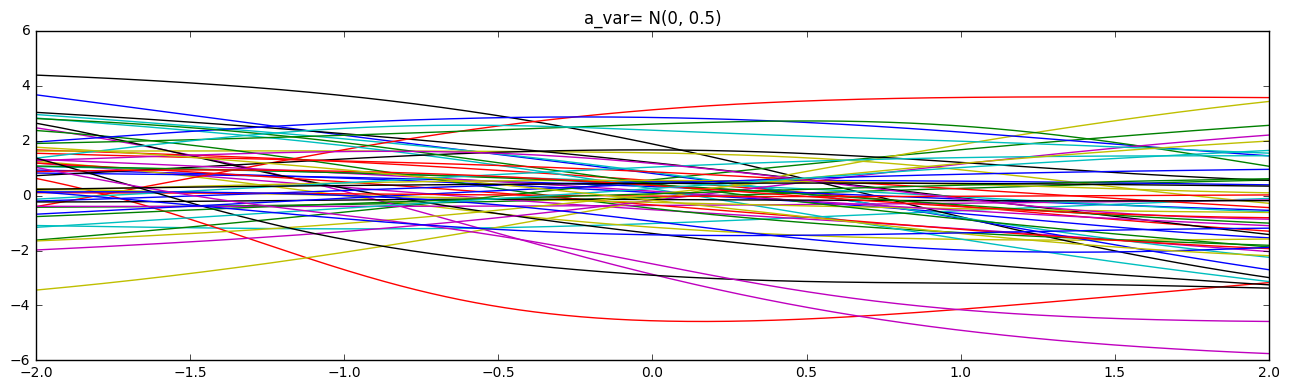

In [38]:
X = np.linspace(-2, 2, num=1000)
all_output = mlps(X, a_var=0.5, mlpNum=50, numHiden=10)  
plot_mlps(all_output, label='a_var= N(0, 0.5)')

### 2.2b answer
difference: The second one more linear,more smooth than the first plot. The first one are very likely to have dramatic change.

### (c) 
Compute the mean squared error between each of these 2x50 input-output functions and the
function g(x)= −x. Which MLPs from these two classes approximate g best? Plot these 2
functions.

y_1(x): MSE=0.44

y_2(x): MSE=0.04

y_2(x) approximate g best



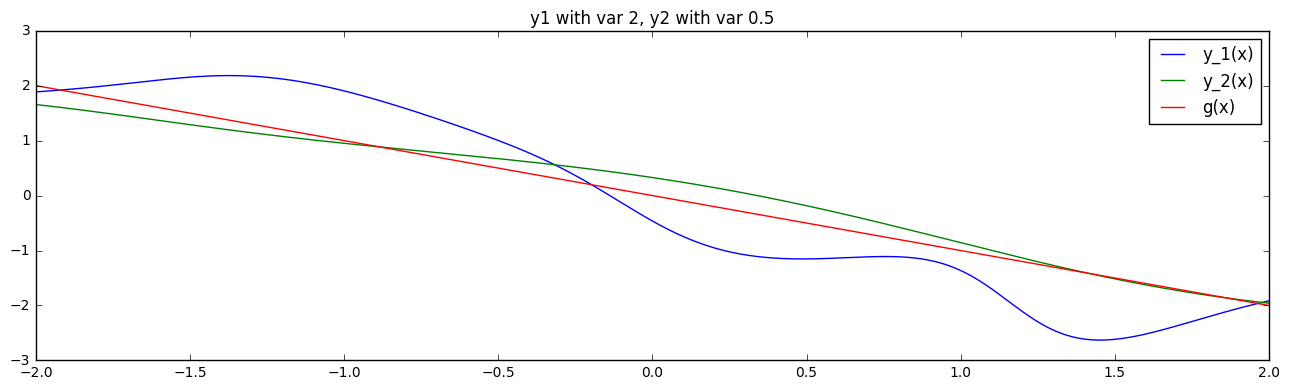

In [84]:
np.random.seed(666)

def g(x):
    return -x

g_outputs = [(x, g(x)) for x in X]

y1_outputs = mlps( X, a_var=2)
y2_outputs = mlps( X, a_var=0.5)

def sqErros(o1,o2):
    return [(np.average([(xy[1] - xg[1])**2 
                                for xg, xy in zip(o2, ys)]), ys, )
                  for ys  in o1]

sq_1 =  sqErros(y1_outputs,g_outputs)
sq_2 =  sqErros(y2_outputs,g_outputs)

best_mlp1 = min(sq_1, key=lambda x: x[0])
best_mlp2 = min(sq_2, key=lambda x: x[0])


def plot(ax, data, label):
    zips = np.array(data).T
    ax.plot(zips[0], zips[1], label=label)
    

fig, ax = plt.subplots(1, 1, figsize=(13, 4))
plot(ax, best_mlp1[1], label='y_1(x)' )
plot(ax, best_mlp2[1], label='y_2(x)')
plot(ax, all_gs, label='g(x)')
ax.set_title('y1 with var 2, y2 with var 0.5')
plt.legend()
fig.tight_layout()

print('y_1(x): MSE={:.2f}\n'.format(best_mlp1[0]))
print('y_2(x): MSE={:.2f}\n'.format(best_mlp2[0]))
print('y_2(x) approximate g best\n')